This notebook prepares the documentation in the user manual on increment-and-fix continuation with aposteriori step size control.

# Increment-and-Fix Aposteriori Step Control

An *artificial-parameter homotopy* to solve

$$
   \left\{
      \begin{array}{rcl}
         x^2 + 4 y^2 - 4 & = & 0 \\
               2 y^2 - x & = & 0
      \end{array}
   \right.
$$

with the total degree start system

$$
   \left\{
      \begin{array}{rcl}
         x^2 - 1 & = & 0 \\
         y^2 - 1 & = & 0
      \end{array}
   \right.
$$

uses a random complex constant $\gamma$ in

$$
   \gamma (1 - t)
   \left(
      \begin{array}{r}
         x^2 + 4 y^2 - 4 \\
               2 y^2 - x
      \end{array}
   \right)
   +
   t
   \left(
      \begin{array}{c}
         x^2 - 1 \\
         y^2 - 1
      \end{array}
   \right)
   =
   \left(
      \begin{array}{c}
         0 \\ 0
      \end{array}
   \right),
$$

where $t$ is an artificial parameter to define the deformation of the start system into the target system.

During the continuation, a predictor-corrector method is applied.  The predictor advances the value of $t$, predicts the corresponding solution for the new value of $t$, and then fixes the value of $t$ in the corrector stage.  Because $t$ is fixed during the corrector stage, this type of continuation is called *increment-and-fix continuation*.

An *aposteriori step size control algorithm* uses the performance of the corrector to determine the step size for the continuation parameter $t$.

Let us first define the target and start system for the running example.

In [1]:
target = ['x^2 + 4*y^2 - 4;', '2*y^2 - x;']
target

['x^2 + 4*y^2 - 4;', '2*y^2 - x;']

In [2]:
from phcpy.starters import total_degree_start_system

PHCv2.4.88 released 2023-12-26 works!


In [3]:
start, startsols = total_degree_start_system(target)

In [4]:
len(startsols)

4

In [5]:
from phcpy.dimension import set_seed
set_seed(2024)

0

# 1. let the path trackers run

To run the path trackers in double precision:

In [6]:
from phcpy.trackers import double_track

In [7]:
gamma, sols = double_track(target, start, startsols)
gamma

(0.9909228673805146+0.13443165885452354j)

By default, ``double_track`` will generate a random $\gamma$ and return the generated value.  This value can then be used in a second run.

In [8]:
for (idx, sol) in enumerate(sols):
    print('Solution', idx+1, ':')
    print(sol)

Solution 1 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.23606797749979E+00  -7.83036536159823E-54
 y :  7.86151377757423E-01   1.30506089359970E-54
== err :  1.309E-16 = rco :  1.998E-01 = res :  4.441E-16 =
Solution 2 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x :  1.23606797749979E+00  -7.83036536159823E-54
 y : -7.86151377757423E-01  -1.30506089359970E-54
== err :  1.309E-16 = rco :  1.998E-01 = res :  4.441E-16 =
Solution 3 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x : -3.23606797749979E+00   4.48415508583941E-43
 y :  1.79366203433577E-43   1.27201964951407E+00
== err :  2.469E-16 = rco :  1.079E-01 = res :  2.220E-15 =
Solution 4 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 x : -3.23606797749979E+00   4.48415508583941E-43
 y : -1.79366203433577E-43  -1.27201964951407E+00
== err :  2.469E-16 = rco :  1.079E-01 = res :  2.220E-15 =


Suppose we would want to recompute the first path in quad double precision.

In [9]:
from phcpy.trackers import quad_double_track

Even if we track only one path, the start solution must be given in a list of one element.

In [10]:
gamma, qdsol = quad_double_track(target, start, [startsols[0]], gamma=gamma)
gamma

(0.9909228673805146+0.13443165885452354j)

In [11]:
print(qdsol[0])

t : 1.0000000000000000000000000000000000000000000000000000000000000000E+00      0.0000000000000000000000000000000000000000000000000000000000000000E+00    
m : 1
the solution for t :
 x : 1.2360679774997896964091736687112245466397720300428837424886381358E+00      5.2497885369372712211600139779556831211848522830314280165022979689E-29    
 y : 7.8615137775742328606955858581796309928412366437141617728272590607E-01      2.8989974767754191658753739936213644968082413325536216460627087163E-29    
== err :  2.205E-14 = rco :  1.998E-01 = res :  5.189E-28 =


Observe that the values for the forward and backward error, the ``err`` and ``res`` respectively, are still rather large for quad double precision.  For this example, we could as well run a couple of extra steps of Newton's method, but suppose that we want to track the paths with much smaller tolerances.

# 2. tuning tolerances of the path trackers

Let us redo the last run, but now with much smaller tolerances on the corrector.

In [12]:
from phcpy.trackers import write_parameters
write_parameters()

GLOBAL MONITOR :
  1. the condition of the homotopy           : 0
  2. number of paths tracked simultaneously  : 1
  3. maximum number of steps along a path    : 500
  4. distance from target to start end game  : 1.000e-01
  5. order of extrapolator in end game       : 0
  6. maximum number of re-runs               : 1
STEP CONTROL (PREDICTOR) :                    along path : end game
  7: 8. type ( x:Cub,t:Rea ):( x:Cub,t:Rea ) : 8         : 8
  9:10. minimum step size                    : 1.000e-06 : 1.000e-08
 11:12. maximum step size                    : 1.000e-01 : 1.000e-02
 13:14. reduction factor for step size       : 7.000e-01 : 5.000e-01
 15:16. expansion factor for step size       : 1.250e+00 : 1.100e+00
 17:18. expansion threshold                  : 1         : 3
PATH CLOSENESS (CORRECTOR) :                  along path : end game
 19:20. maximum number of iterations         : 3         : 3
 21:22. relative precision for residuals     : 1.000e-09 : 1.000e-11
 23:24. absolut

0

In [13]:
from phcpy.trackers import set_parameter_value

To set the tolerance for the relative precision for the residuals along the path to ``1.0e-32``, the parameter at position ``21`` has to be set, as follows:

In [14]:
set_parameter_value(21, 1.0e-32)

0

In [15]:
write_parameters()

GLOBAL MONITOR :
  1. the condition of the homotopy           : 0
  2. number of paths tracked simultaneously  : 1
  3. maximum number of steps along a path    : 500
  4. distance from target to start end game  : 1.000e-01
  5. order of extrapolator in end game       : 0
  6. maximum number of re-runs               : 1
STEP CONTROL (PREDICTOR) :                    along path : end game
  7: 8. type ( x:Cub,t:Rea ):( x:Cub,t:Rea ) : 8         : 8
  9:10. minimum step size                    : 1.000e-06 : 1.000e-08
 11:12. maximum step size                    : 1.000e-01 : 1.000e-02
 13:14. reduction factor for step size       : 7.000e-01 : 5.000e-01
 15:16. expansion factor for step size       : 1.250e+00 : 1.100e+00
 17:18. expansion threshold                  : 1         : 3
PATH CLOSENESS (CORRECTOR) :                  along path : end game
 19:20. maximum number of iterations         : 3         : 3
 21:22. relative precision for residuals     : 1.000e-32 : 1.000e-11
 23:24. absolut

0

For this problem, the difference between absolute and relative does not matter, and neither does the difference between the residuals and corrections, as the paths are well conditioned.
Along the path, we set the tolerance to ``1.0e-32`` and at the end to ``1.0e-48``.

In [16]:
for idx in [23, 25, 27]:
    set_parameter_value(idx, 1.0e-32)
for idx in [22, 24, 26, 28]:
    set_parameter_value(idx, 1.0e-48)
write_parameters()

GLOBAL MONITOR :
  1. the condition of the homotopy           : 0
  2. number of paths tracked simultaneously  : 1
  3. maximum number of steps along a path    : 500
  4. distance from target to start end game  : 1.000e-01
  5. order of extrapolator in end game       : 0
  6. maximum number of re-runs               : 1
STEP CONTROL (PREDICTOR) :                    along path : end game
  7: 8. type ( x:Cub,t:Rea ):( x:Cub,t:Rea ) : 8         : 8
  9:10. minimum step size                    : 1.000e-06 : 1.000e-08
 11:12. maximum step size                    : 1.000e-01 : 1.000e-02
 13:14. reduction factor for step size       : 7.000e-01 : 5.000e-01
 15:16. expansion factor for step size       : 1.250e+00 : 1.100e+00
 17:18. expansion threshold                  : 1         : 3
PATH CLOSENESS (CORRECTOR) :                  along path : end game
 19:20. maximum number of iterations         : 3         : 3
 21:22. relative precision for residuals     : 1.000e-32 : 1.000e-48
 23:24. absolut

0

Now we rerun the first path once more.

In [17]:
gamma, qdsol = quad_double_track(target, start, [startsols[0]], gamma=gamma)
gamma

(0.9909228673805146+0.13443165885452354j)

In [18]:
print(qdsol[0])

t : 1.0000000000000000000000000000000000000000000000000000000000000000E+00      0.0000000000000000000000000000000000000000000000000000000000000000E+00    
m : 1
the solution for t :
 x : 1.2360679774997896964091736687312762354406183596115257242708972454E+00      1.1332755766389085799263380696649555479105856277329315304108746845E-124   
 y : 7.8615137775742328606955858584295892952312205783772323766490197011E-01      2.8241719041687415333552425250016477737787624697015224888149219850E-124   
== err :  4.197E-62 = rco :  1.998E-01 = res :  1.187E-66 =


Observe that the values of ``err`` and ``res`` (forward and backward error respectively) are much smaller than before, very close to the quad double precision.

For the experiments in the next section, the values of the continuation parameters must be reset to their defaults.

In [19]:
from phcpy.trackers import autotune_parameters

In [20]:
autotune_parameters(0, 14)

0

In [21]:
write_parameters()

GLOBAL MONITOR :
  1. the condition of the homotopy           : 0
  2. number of paths tracked simultaneously  : 1
  3. maximum number of steps along a path    : 500
  4. distance from target to start end game  : 1.000e-01
  5. order of extrapolator in end game       : 0
  6. maximum number of re-runs               : 1
STEP CONTROL (PREDICTOR) :                    along path : end game
  7: 8. type ( x:Cub,t:Rea ):( x:Cub,t:Rea ) : 8         : 8
  9:10. minimum step size                    : 1.000e-06 : 1.000e-08
 11:12. maximum step size                    : 1.000e-01 : 1.000e-02
 13:14. reduction factor for step size       : 7.000e-01 : 5.000e-01
 15:16. expansion factor for step size       : 1.250e+00 : 1.100e+00
 17:18. expansion threshold                  : 1         : 3
PATH CLOSENESS (CORRECTOR) :                  along path : end game
 19:20. maximum number of iterations         : 3         : 3
 21:22. relative precision for residuals     : 1.000e-08 : 1.000e-11
 23:24. absolut

0

# 3. a step-by-step path tracker

When we run a path tracker, or let a path tracker run, then the path tracker has the control of the order of execution.  In a step-by-step path tracker, we can ask the path tracker for the next point of the path, which is useful to plot the points along a path.

In [22]:
from phcpy.trackers import initialize_double_tracker
from phcpy.trackers import initialize_double_solution
from phcpy.trackers import next_double_solution

In [23]:
gamma

(0.9909228673805146+0.13443165885452354j)

In [24]:
initialize_double_tracker(target, start, regamma=gamma.real, imgamma=gamma.imag)

0

In [25]:
initialize_double_solution(len(target), startsols[0])

0

In [26]:
nextsol = next_double_solution()
print(nextsol)

t :  1.00000000000000E-01   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.96326698649568E-01   4.70406409720798E-03
 y :  9.96408257454631E-01   4.95315220446915E-03
== err :  2.375E-05 = rco :  1.000E+00 = res :  3.619E-10 =


In [27]:
nextsol = next_double_solution()
print(nextsol)

t :  2.00000000000000E-01   0.00000000000000E+00
m : 1
the solution for t :
 x :  9.79864035891029E-01   1.70985015865591E-02
 y :  9.81181263858417E-01   2.32157127720825E-02
== err :  1.679E-08 = rco :  1.000E+00 = res :  2.760E-16 =


In [28]:
from phcpy.solutions import strsol2dict

In [29]:
dictsol = strsol2dict(nextsol)
dictsol['t']

(0.2+0j)

In the code cell below, the loop continues calling ``next_double_solution`` until the value of the continuation parameter is less than 1.0.  The real part and imaginary part of the gamma constant are fixed for a deterministic run.

In [30]:
gamma

(0.9909228673805146+0.13443165885452354j)

In [31]:
initialize_double_tracker(target, start, fixedgamma=False, \
                          regamma=gamma.real, imgamma=gamma.imag)
initialize_double_solution(len(target), startsols[0])
tval = 0.0
path = [startsols[0]]
while tval < 1.0:
    nextsol = next_double_solution()
    dictsol = strsol2dict(nextsol)
    tval = dictsol['t'].real
    path.append(nextsol)

In [32]:
for sol in path:
    print(strsol2dict(sol)['x'])

(1+0j)
(0.994224674065049+0.000736554050836963j)
(0.977037887826254+0.00212452436802329j)
(0.964519519486173-0.000301511635002853j)
(0.991400413634025-0.00853212390141997j)
(1.06106209939623-0.0131701395931042j)
(1.13519017645373-0.0105783830081142j)
(1.18842134127057-0.00581898658605697j)
(1.21877418410123-0.00226431061269353j)
(1.23255791318615-0.000472870698379056j)
(1.2360679774998+6.31250244322903e-16j)


In [33]:
xre = [strsol2dict(sol)['x'].real for sol in path]
xre

[1.0,
 0.994224674065049,
 0.977037887826254,
 0.964519519486173,
 0.991400413634025,
 1.06106209939623,
 1.13519017645373,
 1.18842134127057,
 1.21877418410123,
 1.23255791318615,
 1.2360679774998]

The imaginary parts of the x-coordinates and the two parts of the y-coordinates are set below.

In [34]:
xim = [strsol2dict(sol)['x'].imag for sol in path]
xim

[0.0,
 0.000736554050836963,
 0.00212452436802329,
 -0.000301511635002853,
 -0.00853212390141997,
 -0.0131701395931042,
 -0.0105783830081142,
 -0.00581898658605697,
 -0.00226431061269353,
 -0.000472870698379056,
 6.31250244322903e-16]

In [35]:
yre = [strsol2dict(sol)['y'].real for sol in path]
yim = [strsol2dict(sol)['y'].imag for sol in path]

Let us plot the coordinates of this first solution path.

In [36]:
import matplotlib.pyplot as plt

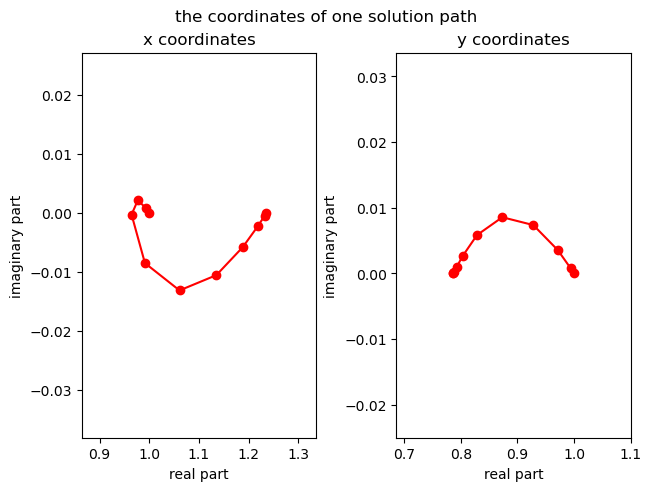

In [37]:
fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.suptitle('the coordinates of one solution path')
axs[0].set_title('x coordinates')
axs[0].set_xlabel('real part')
axs[0].set_ylabel('imaginary part')
axs[0].set_xlim(min(xre)-0.1, max(xre)+0.1)
axs[0].set_ylim(min(xim)-0.025, max(xim)+0.025)
dots, = axs[0].plot(xre,xim,'r-')
dots, = axs[0].plot(xre,xim,'ro')
axs[1].set_title('y coordinates')
axs[1].set_xlabel('real part')
axs[1].set_ylabel('imaginary part')
axs[1].set_xlim(min(yre)-0.1, max(yre)+0.1)
axs[1].set_ylim(min(yim)-0.025, max(yim)+0.025)
dots, = axs[1].plot(yre,yim,'r-')
dots, = axs[1].plot(yre,yim,'ro')
plt.savefig('incfixaposteriorifig1')
plt.show()

Why do the paths in such a simple homotopy curve so much?